# Using Python & R in the same notebook

To run this notebook, an implementation of R should be installed in your environment, as well as the `rpy2` package that "translates" between Python and R data types.

Import numpy for numerical arrays in Python, and load the `rpy2` iPython extension.

In [13]:
import numpy as np
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## Translating variables between Python and R

Define a vector in R, and assign it to the variable `values`, which is exported to Python (`-o` option).

In [7]:
%%R -o values
values <- c(3, 7, 5)

`values` is now also a Python variable, but with a `rpy2` specific type.

In [8]:
type(values)

rpy2.robjects.vectors.FloatVector

A `FloatVector` supports some of the useful Python interfaces, so we can use the built-in Python `sum` function.

In [9]:
sum(values)

15.0

We can define a numpy array, and use that in R as if it were a vector.

In [20]:
p_values = np.array([3, 7, 9], dtype=np.float64)

In [35]:
%%R -i p_values -o my_sum
cat('R type:', typeof(p_values))
my_sum <- sum(p_values)

R type: double

Although the result is semantically a number, it is returned as a `FloatVector` as is typical in R.

In [36]:
type(my_sum)

rpy2.robjects.vectors.FloatVector

In [27]:
print(my_sum[0])

19.0


In [28]:
type(my_sum[0])

float

## Using R libraries

In [39]:
%R require(ggplot2)

/home/gjb/miniconda3/envs/r_py/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)


array([1], dtype=int32)

In [40]:
import pandas as pd
df = pd.DataFrame({
        'Letter': ['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c'],
        'X': [4, 3, 5, 2, 1, 7, 7, 5, 9],
        'Y': [0, 4, 3, 6, 7, 10, 11, 9, 13],
        'Z': [1, 2, 3, 1, 2, 3, 1, 2, 3]
    })

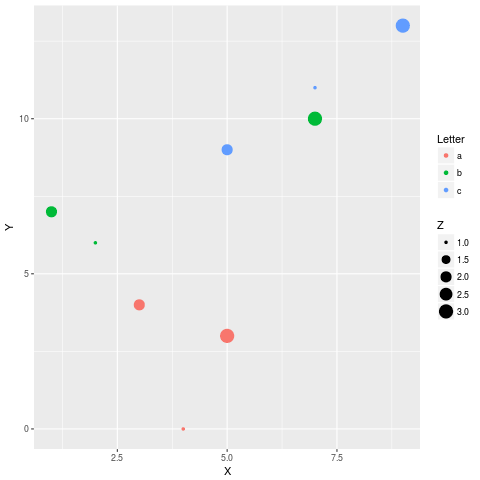

In [41]:
%%R -i df
ggplot(data = df) + geom_point(aes(x = X, y= Y, color = Letter, size = Z))